In [86]:
import pandas as pd
import numpy as np
from prophet import Prophet
import datetime
import matplotlib.pyplot as plt
from pandas import read_csv

In [87]:
def prophet_(data: pd.DataFrame) -> list:
    """
    get prediction by using fbprophet
    :param data:  Dataframe - data with two columns date and y
    :return:      Dateframe - predict result
    """
    subset = pd.DataFrame({
        'ds': data.Date,
        'y': data.Valeur,
    })

    m = Prophet(
        daily_seasonality=True,
#         weekly_seasonality=True,
        yearly_seasonality=False,
        growth='linear',
    )
    m.fit(subset)

    future = m.make_future_dataframe(periods=100, freq='H')

    forecast = m.predict(future)
    
    fig1 = m.plot(forecast)
    
    return forecast

In [88]:
file_name = 'maregraphie_csv_4_2021.csv'

In [89]:
data_ = read_csv(file_name, header=0, parse_dates=True, squeeze=True)  # index_col=0,
data = data_.drop(columns=['Source'])
dfcol = ['Valeur']
data

C:\Users\USR\AppData\Local\Temp\ipykernel_6344\3957713608.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data_ = read_csv(file_name, header=0, parse_dates=True, squeeze=True)  # index_col=0,


,Date,Valeur
0,01/01/2021 00:00:00,2.107
1,01/01/2021 01:00:00,3.003
2,01/01/2021 02:00:00,4.256
3,01/01/2021 03:00:00,5.529
4,01/01/2021 04:00:00,6.476
...,...,...
8664,31/12/2021 19:00:00,2.316
8665,31/12/2021 20:00:00,1.826
8666,31/12/2021 21:00:00,2.082
8667,31/12/2021 22:00:00,2.926


In [90]:
split = round(len(data) * 0.8)
train = data[:split]
test = data[split:]

19:54:38 - cmdstanpy - INFO - Chain [1] start processing
19:54:39 - cmdstanpy - INFO - Chain [1] done processing


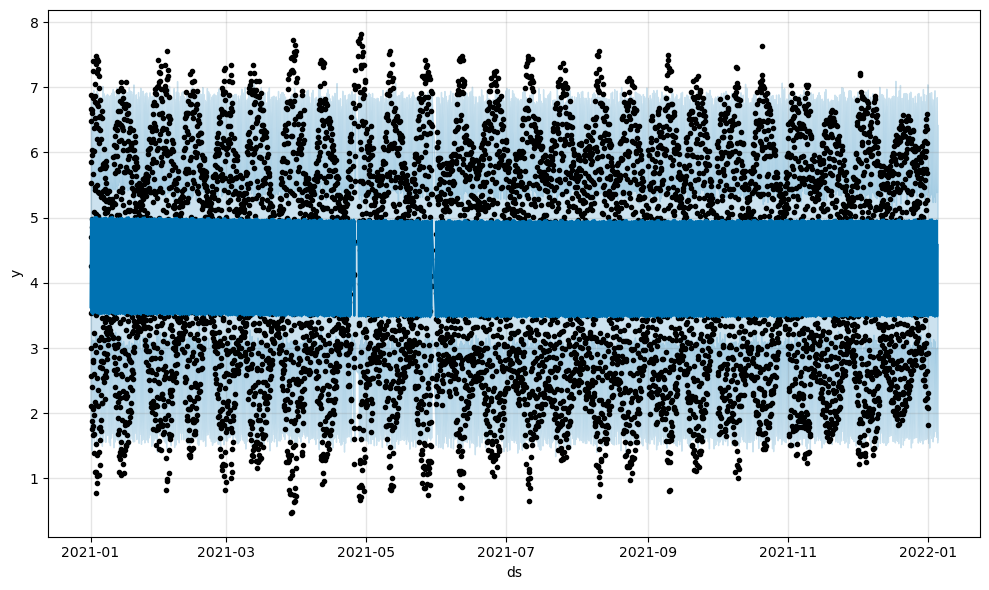

In [91]:
result = prophet_(data)

In [92]:
len(result)

8769

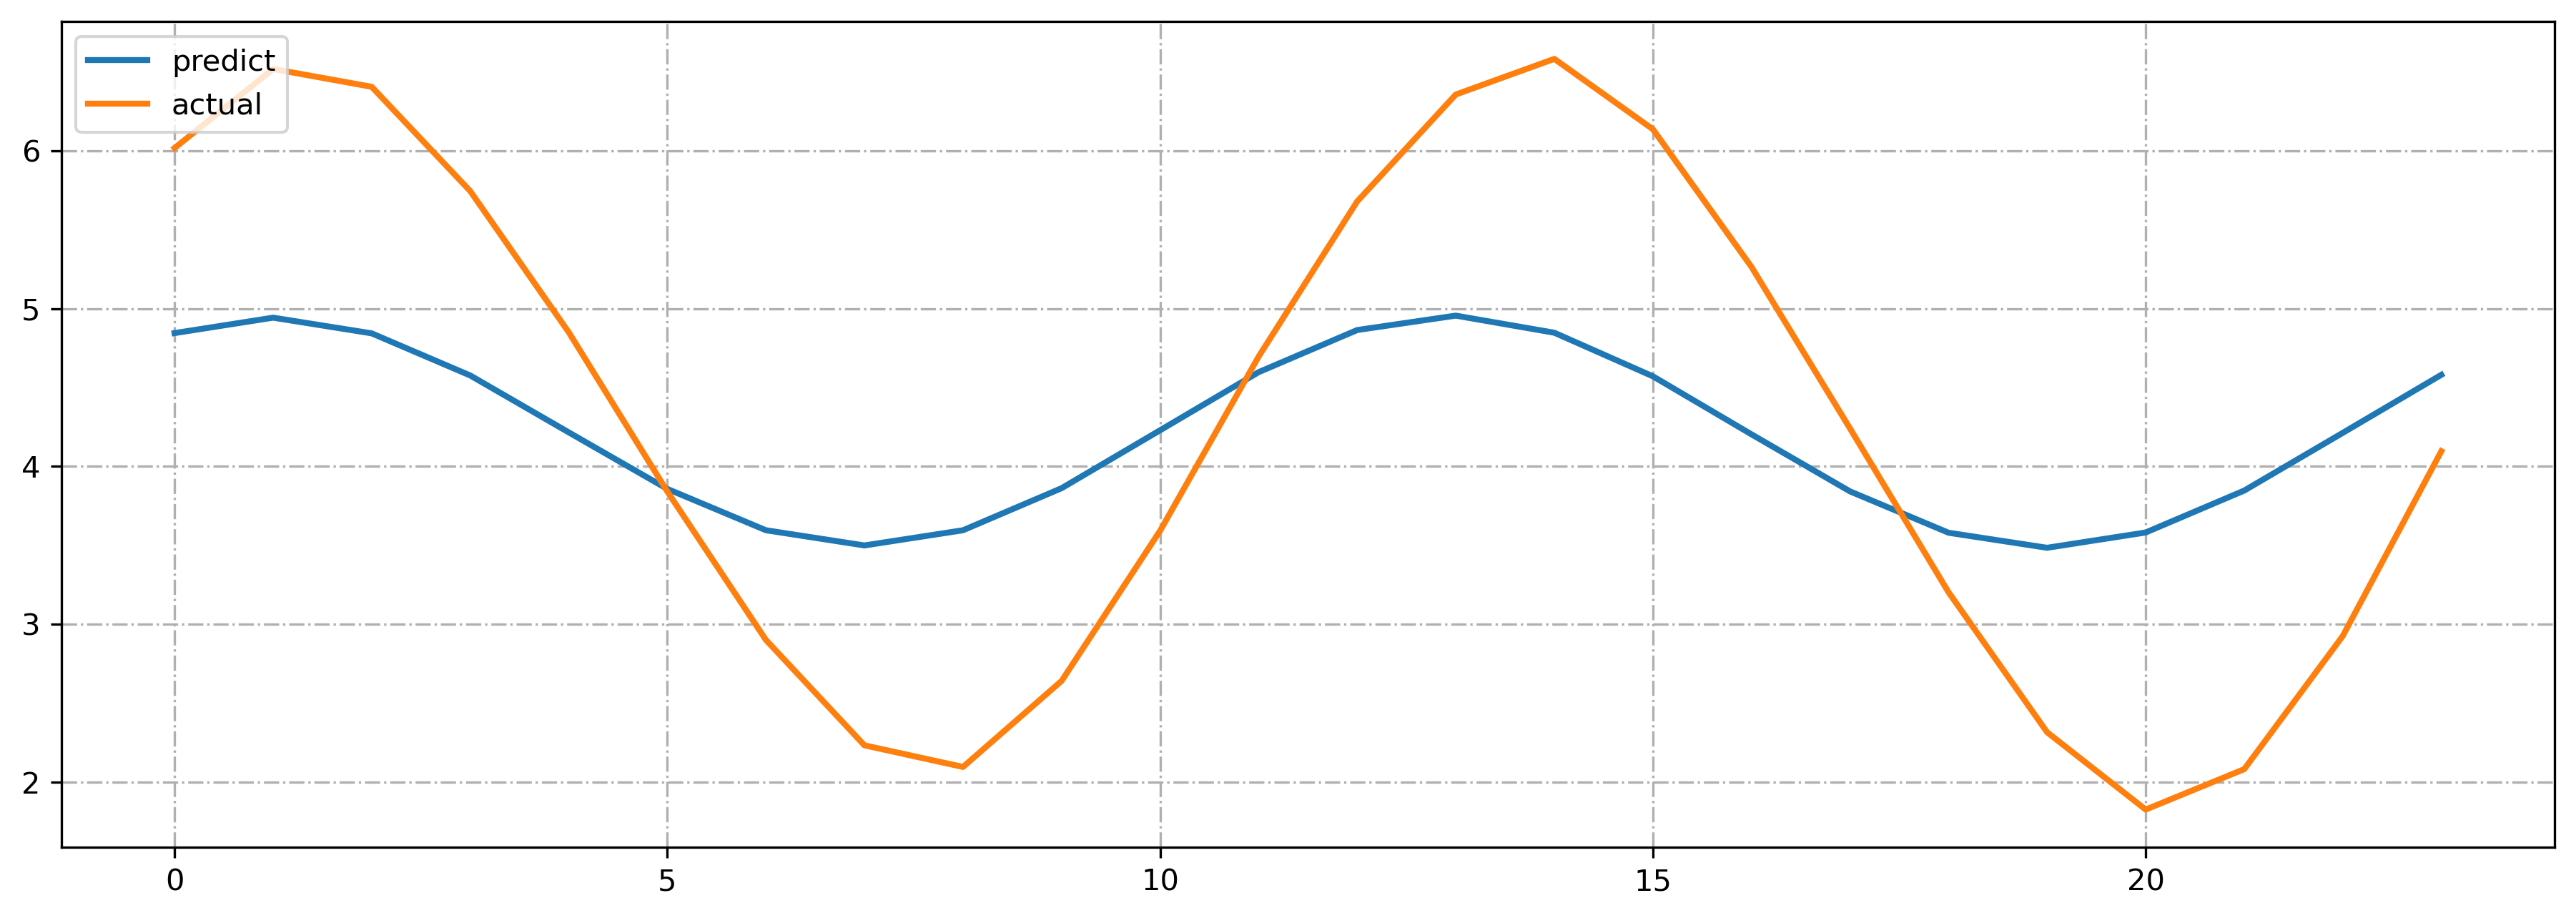

In [93]:
predict = result.tail(24).yhat.values
actual = data.tail(24).Valeur.values
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(15,5), dpi = 300)
ax.plot(x, predict, linewidth=2.0, label = "predict")
ax.plot(x, actual, linewidth=2.0, label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
#     plt.ylim((0, 450000))
plt.grid(linestyle='-.')
plt.show()

In [94]:
error = 0
summery = 0
for i in range(24):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

0.7519461013668178